<a href="https://colab.research.google.com/github/rhks13/Closure-Prediction/blob/main/%EC%83%81%EA%B6%8C_%ED%8A%B9%EC%84%B1_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B3%91%ED%95%A9%EC%9E%91%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
from glob import glob

# 상권영역 관련정보
http://data.seoul.go.kr/dataList/OA-15560/S/1/datasetView.do

상권배후지 영역의 좌표별 분류가 안된다..

상권 분류 설명
https://golmok.seoul.go.kr/introduce.do

In [ ]:
# # 좌표별 상권 분류를 할 수 있는 데이터 압축 해제 >> 이제 이미 다 압축 풀어놔서 코드 실행 안해도 됨.
# os.mkdir("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권영역)")
# %cd /content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권영역)
# !unzip -qq "/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권영역).zip"

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.1 MB/s 
     |████████████████████████████████| 16.7 MB 41.2 MB/s 
     |████████████████████████████████| 6.3 MB 42.8 MB/s 


In [ ]:
import geopandas as gpd
inf_comercial_area = gpd.read_file('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/raw data/서울시_우리마을가게_상권분석서비스(신_상권영역)/TBGIS_TRDAR_RELM.shp',encoding='utf-8')

In [ ]:
inf_comercial_area.head()

,STDR_YM_CD,TRDAR_SE_C,TRDAR_SE_1,TRDAR_NO,TRDAR_NM,XCNTS_VALU,YDNTS_VALU,SIGNGU_CD,ADSTRD_CD,geometry
0,202112,A,골목상권,2110753,시흥동 은행나무사거리,191934.0,438813.0,11545,11545710,"POLYGON ((192008.560 438553.170, 191987.740 43..."
1,202112,A,골목상권,2110427,노원 을지대학교병원,206265.0,459431.0,11350,11350611,"POLYGON ((206296.880 459321.710, 206238.710 45..."
2,202112,A,골목상권,2110755,동일여자고등학교,192300.0,439070.0,11545,11545680,"POLYGON ((192443.040 439028.230, 192507.940 43..."
3,202112,A,골목상권,2110739,시흥3동 우편취급국,191289.0,438014.0,11545,11545690,"POLYGON ((191390.840 437878.790, 191371.650 43..."
4,202112,A,골목상권,2111017,송파나루역 3번,210222.0,445516.0,11710,11710562,"POLYGON ((210354.670 445450.290, 210314.560 44..."


In [ ]:
inf_comercial_area.to_excel('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/상권리스트.xlsx',encoding='utf-8')

In [ ]:
inf_comercial_area['STDR_YM_CD'].unique() # 상권을 구분한 년도는 2021년 12월로 하나뿐 

array(['202112'], dtype=object)

In [ ]:
inf_comercial_area['TRDAR_SE_C'].unique() # 상권을 구분코드 총 4개

array(['A', 'D', 'R', 'U'], dtype=object)

A: 골목상권
D: 발달상권
R: 전통시장
U: 관광특구 

In [ ]:
inf_comercial_area[inf_comercial_area['TRDAR_SE_C']=='D']

,STDR_YM_CD,TRDAR_SE_C,TRDAR_SE_1,TRDAR_NO,TRDAR_NM,XCNTS_VALU,YDNTS_VALU,SIGNGU_CD,ADSTRD_CD,geometry
1090,202112,D,발달상권,2120234,가락시장역,210458.0,443967.0,11710,11710620,"POLYGON ((210342.670 443526.890, 210252.720 44..."
1091,202112,D,발달상권,2120175,남부터미널역,201601.0,442843.0,11650,11650510,"POLYGON ((201752.480 442664.410, 201777.270 44..."
1092,202112,D,발달상권,2120137,문래역(문래로데오거리),190840.0,446506.0,11560,11560605,"POLYGON ((190855.760 446471.460, 190919.770 44..."
1093,202112,D,발달상권,2120035,퇴계로5가,200193.0,451556.0,11140,11140590,"POLYGON ((200323.330 451546.540, 200349.290 45..."
1094,202112,D,발달상권,2120073,미아사거리,202532.0,456473.0,11290,11290715,"POLYGON ((202732.120 456405.350, 202746.300 45..."
...,...,...,...,...,...,...,...,...,...,...
1334,202112,D,발달상권,2120226,석촌고분역,208550.0,444902.0,11710,11710610,"POLYGON ((208561.070 444549.440, 208509.860 44..."
1335,202112,D,발달상권,2120031,을지로3가역,199251.0,451877.0,11140,11140605,"POLYGON ((199471.560 451643.370, 199416.930 45..."
1336,202112,D,발달상권,2120038,약수역,200940.0,450483.0,11140,11140625,"POLYGON ((200725.230 450254.800, 200688.850 45..."
1337,202112,D,발달상권,2120216,경기고교사거리(경기고교앞사거리),205001.0,446821.0,11680,11680565,"POLYGON ((205057.550 446687.340, 204988.710 44..."


In [ ]:
inf_comercial_area['ADSTRD_CD'].value_counts() # 행정동 안에서도 그안에 상권코드가 나뉘어짐을 보인다. >> 결국 x, y좌표를 통해 통일화해야한다.

11560535    18
11230545    17
11440660    14
11680640    14
11110615    13
            ..
11530510     1
11620585     1
11740520     1
11620715     1
11710566     1
Name: ADSTRD_CD, Length: 402, dtype: int64

In [ ]:
len(inf_comercial_area['ADSTRD_CD'].unique())

402

In [ ]:
inf_comercial_area['SIGNGU_CD'].value_counts()

11680    103
11560     98
11140     80
11650     78
11440     77
11230     77
11110     77
11290     76
11620     74
11500     70
11710     70
11380     68
11305     63
11215     62
11410     62
11260     61
11530     60
11740     60
11590     57
11170     57
11470     56
11200     55
11545     45
11320     43
11350     42
Name: SIGNGU_CD, dtype: int64

In [ ]:
len(inf_comercial_area['SIGNGU_CD'].unique())

25

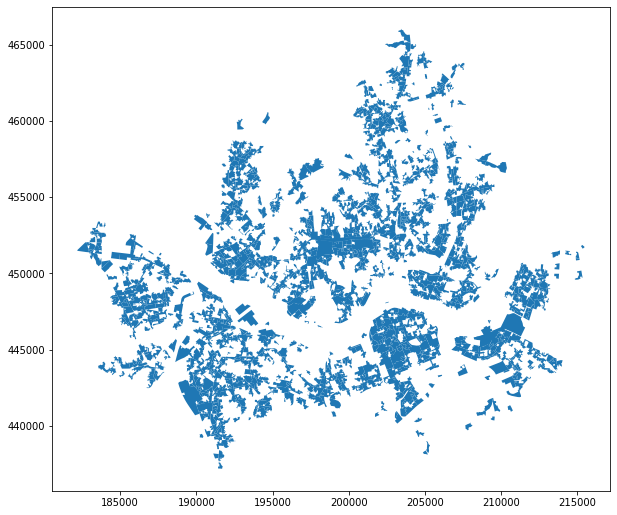

In [ ]:
# 서울시 상권코드를 알수 있는 지역을 이미지로 확인할 수 있다
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,20)
inf_comercial_area.plot()
plt.show()

In [ ]:
# 상권 칼럼 축소하고 칼럼이름 다시하기
inf_comercial_area = inf_comercial_area.iloc[:,1:]
inf_comercial_area.columns = ['상권_구분_코드','상권_구분_코드_명','상권_코드','상권_코드_명','X좌표','Y좌표','시군구_코드','행정동_코드','geometry']
inf_comercial_area

,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,X좌표,Y좌표,시군구_코드,행정동_코드,geometry
0,A,골목상권,2110753,시흥동 은행나무사거리,191934.0,438813.0,11545,11545710,"POLYGON ((192008.560 438553.170, 191987.740 43..."
1,A,골목상권,2110427,노원 을지대학교병원,206265.0,459431.0,11350,11350611,"POLYGON ((206296.880 459321.710, 206238.710 45..."
2,A,골목상권,2110755,동일여자고등학교,192300.0,439070.0,11545,11545680,"POLYGON ((192443.040 439028.230, 192507.940 43..."
3,A,골목상권,2110739,시흥3동 우편취급국,191289.0,438014.0,11545,11545690,"POLYGON ((191390.840 437878.790, 191371.650 43..."
4,A,골목상권,2111017,송파나루역 3번,210222.0,445516.0,11710,11710562,"POLYGON ((210354.670 445450.290, 210314.560 44..."
...,...,...,...,...,...,...,...,...,...
1666,U,관광특구,1001493,동대문패션타운 관광특구,200974.0,451975.0,11140,11140590,"POLYGON ((201553.986 452217.686, 201565.113 45..."
1667,U,관광특구,1001494,종로·청계 관광특구,199768.0,452273.0,11110,11110615,"POLYGON ((198035.749 452283.911, 198019.497 45..."
1668,U,관광특구,1001495,잠실 관광특구,210191.0,446339.0,11710,11710566,"POLYGON ((208228.914 445674.947, 208197.649 44..."
1669,U,관광특구,1001496,강남 마이스 관광특구,205310.0,445727.0,11680,11680580,"POLYGON ((205328.897 446048.923, 205339.561 44..."


In [ ]:
list1 = inf_comercial_area['상권_코드'].unique()

In [ ]:
len(list1)

1671

# 자치구별 상권변화지표 관련 사이트
http://data.seoul.go.kr/dataList/OA-15575/S/1/datasetView.do#

상권변화지표 : 상업공간의 변화를 생존한 사업체의 평균 영업기간과 폐업한 사업체의 평균 영업기간을 기준으로 4개 등급으로 나눈 지표

LL : 도시재생 및 신규 개발 상권으로 창업 진출입시 세심한 주의가 필요한 상권(지역), 특정시점 사업체의 영업기간이 서울시 평균 생존영업기간보다 낮고, 서울시 평균 폐업영업기간보다 낮은 상권(지역)

LH : 경쟁력 있는 신규 창업 우위 상권(지역), 특정 시점 사업체의 영업기간이 서울시 평균 생존영업기간보다 낮고, 서울시 평균 폐업영업기간보다 높은 상권(지역)

HL : 경쟁력 있는 기존 업체 우위 상권(지역), 특정 시점 사업체의 영업기간이 서울시 평균 생존영업기간보다 높고, 서울시 평균 폐업영업기간보다 낮은 상권(지역)

HH : 창업 진출입시 세심한 주의 상권(지역), 특정 시점 사업체의 영업기간이 서울시 평균 생존영업기간보다 높고, 서울시 평균 폐업영업기간보다 높은 상권(지역)

**행정구별 상권변화지표로 할려고 그랬는데 위에 상권코드의 행정구 개수와 변화지표 행정구 개수가 맞지않아서 좀 더 넓은 구역인 자치구별로 한다.**

Market_Change_Indicator = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시 우리마을가게 상권분석서비스(행정동별 상권변화지표).csv',encoding='euc-kr')
Market_Change_Indicator

In [ ]:
Market_Change_Indicator = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/raw data/서울시 우리마을가게 상권분석서비스(자치구별 상권변화지표).csv',encoding='euc-kr')
Market_Change_Indicator

,기준_년_코드,기준_분기_코드,시군구_코드,시군구_코드_명,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
0,2021,4,11740,강동구,LL,다이나믹,112,52,118,55
1,2021,4,11710,송파구,LL,다이나믹,117,55,118,55
2,2021,4,11680,강남구,LL,다이나믹,110,51,118,55
3,2021,4,11650,서초구,HH,정체,128,56,118,55
4,2021,4,11620,관악구,LL,다이나믹,114,53,118,55
...,...,...,...,...,...,...,...,...,...,...
808,2014,1,11215,광진구,LL,다이나믹,89,44,91,44
809,2014,1,11200,성동구,HH,정체,93,46,91,44
810,2014,1,11170,용산구,HH,정체,101,47,91,44
811,2014,1,11140,중구,HH,정체,114,49,91,44


In [ ]:
Market_Change_Indicator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   기준_년_코드         813 non-null    int64 
 1   기준_분기_코드        813 non-null    int64 
 2   시군구_코드          813 non-null    int64 
 3   시군구_코드_명        813 non-null    object
 4   상권_변화_지표        813 non-null    object
 5   상권_변화_지표_명      813 non-null    object
 6   운영_영업_개월_평균     813 non-null    int64 
 7   폐업_영업_개월_평균     813 non-null    int64 
 8   서울_운영_영업_개월_평균  813 non-null    int64 
 9   서울_폐업_영업_개월_평균  813 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 63.6+ KB


In [ ]:
Market_Change_Indicator = Market_Change_Indicator[Market_Change_Indicator['기준_년_코드']>=2017]
Market_Change_Indicator

,기준_년_코드,기준_분기_코드,시군구_코드,시군구_코드_명,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
0,2021,4,11740,강동구,LL,다이나믹,112,52,118,55
1,2021,4,11710,송파구,LL,다이나믹,117,55,118,55
2,2021,4,11680,강남구,LL,다이나믹,110,51,118,55
3,2021,4,11650,서초구,HH,정체,128,56,118,55
4,2021,4,11620,관악구,LL,다이나믹,114,53,118,55
...,...,...,...,...,...,...,...,...,...,...
508,2017,1,11215,광진구,LL,다이나믹,94,49,97,49
509,2017,1,11200,성동구,LH,상권확장,95,52,97,49
510,2017,1,11170,용산구,HH,정체,107,53,97,49
511,2017,1,11140,중구,HH,정체,124,55,97,49


In [ ]:
Market_Change_Indicator=Market_Change_Indicator.iloc[:,:6] # 우리가 예측해야하는것이 폐업이기도하고 제거한 칼럼이 반영되어서 상권 변화 지표가 만들어졌으므로 제거해준다.

In [ ]:
Market_Change_Indicator

,기준_년_코드,기준_분기_코드,시군구_코드,시군구_코드_명,상권_변화_지표,상권_변화_지표_명
0,2021,4,11740,강동구,LL,다이나믹
1,2021,4,11710,송파구,LL,다이나믹
2,2021,4,11680,강남구,LL,다이나믹
3,2021,4,11650,서초구,HH,정체
4,2021,4,11620,관악구,LL,다이나믹
...,...,...,...,...,...,...
508,2017,1,11215,광진구,LL,다이나믹
509,2017,1,11200,성동구,LH,상권확장
510,2017,1,11170,용산구,HH,정체
511,2017,1,11140,중구,HH,정체


In [ ]:
Market_Change_Indicator['시군구_코드'].value_counts() # 1분기마다 상권변화 지표가 재적되었다. 총 20분기여야하는데..

11620    23
11260    23
11710    23
11380    23
11650    21
11740    20
11320    20
11140    20
11170    20
11200    20
11215    20
11230    20
11290    20
11305    20
11410    20
11350    20
11440    20
11470    20
11500    20
11530    20
11545    20
11560    20
11590    20
11680    20
11110    20
Name: 시군구_코드, dtype: int64

In [ ]:
Market_Change_Indicator.isnull().sum()

기준_년_코드       0
기준_분기_코드      0
시군구_코드        0
시군구_코드_명      0
상권_변화_지표      0
상권_변화_지표_명    0
dtype: int64

In [ ]:
Market_Change_Indicator[Market_Change_Indicator['시군구_코드']==11620] # 중복값있음 해당열 몇개 제거 231,261,290

,기준_년_코드,기준_분기_코드,시군구_코드,시군구_코드_명,상권_변화_지표,상권_변화_지표_명
4,2021,4,11620,관악구,LL,다이나믹
29,2021,3,11620,관악구,LL,다이나믹
54,2021,2,11620,관악구,LL,다이나믹
79,2021,1,11620,관악구,LL,다이나믹
104,2020,4,11620,관악구,LL,다이나믹
129,2020,3,11620,관악구,LL,다이나믹
154,2020,2,11620,관악구,LL,다이나믹
179,2020,1,11620,관악구,LL,다이나믹
204,2019,4,11620,관악구,LL,다이나믹
230,2019,3,11620,관악구,LL,다이나믹


In [ ]:
Market_Change_Indicator[Market_Change_Indicator['시군구_코드']==11260] # 중복값있음 해당열 몇개 제거 247,276,305

,기준_년_코드,기준_분기_코드,시군구_코드,시군구_코드_명,상권_변화_지표,상권_변화_지표_명
18,2021,4,11260,중랑구,LL,다이나믹
43,2021,3,11260,중랑구,LL,다이나믹
68,2021,2,11260,중랑구,LL,다이나믹
93,2021,1,11260,중랑구,LL,다이나믹
118,2020,4,11260,중랑구,LL,다이나믹
143,2020,3,11260,중랑구,LL,다이나믹
168,2020,2,11260,중랑구,LL,다이나믹
193,2020,1,11260,중랑구,LL,다이나믹
218,2019,4,11260,중랑구,LL,다이나믹
246,2019,3,11260,중랑구,LL,다이나믹


In [ ]:
Market_Change_Indicator[Market_Change_Indicator['시군구_코드']==11710] # 중복값있음 해당열 몇개 제거 227,256,286

,기준_년_코드,기준_분기_코드,시군구_코드,시군구_코드_명,상권_변화_지표,상권_변화_지표_명
1,2021,4,11710,송파구,LL,다이나믹
26,2021,3,11710,송파구,LL,다이나믹
51,2021,2,11710,송파구,LL,다이나믹
76,2021,1,11710,송파구,LL,다이나믹
101,2020,4,11710,송파구,LL,다이나믹
126,2020,3,11710,송파구,LL,다이나믹
151,2020,2,11710,송파구,LH,상권확장
176,2020,1,11710,송파구,LH,상권확장
201,2019,4,11710,송파구,LL,다이나믹
226,2019,3,11710,송파구,LL,다이나믹


In [ ]:
Market_Change_Indicator[Market_Change_Indicator['시군구_코드']==11380] # 중복값있음 해당열 몇개 제거 240,270,299

,기준_년_코드,기준_분기_코드,시군구_코드,시군구_코드_명,상권_변화_지표,상권_변화_지표_명
13,2021,4,11380,은평구,LL,다이나믹
38,2021,3,11380,은평구,LL,다이나믹
63,2021,2,11380,은평구,LL,다이나믹
88,2021,1,11380,은평구,LL,다이나믹
113,2020,4,11380,은평구,LL,다이나믹
138,2020,3,11380,은평구,LL,다이나믹
163,2020,2,11380,은평구,LL,다이나믹
188,2020,1,11380,은평구,LL,다이나믹
213,2019,4,11380,은평구,LL,다이나믹
240,2019,3,11380,은평구,LL,다이나믹


In [ ]:
Market_Change_Indicator[Market_Change_Indicator['시군구_코드']==11650] # 중복값있음 해당열 몇개 제거 258

,기준_년_코드,기준_분기_코드,시군구_코드,시군구_코드_명,상권_변화_지표,상권_변화_지표_명
3,2021,4,11650,서초구,HH,정체
28,2021,3,11650,서초구,HH,정체
53,2021,2,11650,서초구,HH,정체
78,2021,1,11650,서초구,HH,정체
103,2020,4,11650,서초구,HH,정체
128,2020,3,11650,서초구,HH,정체
153,2020,2,11650,서초구,HH,정체
178,2020,1,11650,서초구,HH,정체
203,2019,4,11650,서초구,HH,정체
229,2019,3,11650,서초구,HH,정체


In [ ]:
Market_Change_Indicator=Market_Change_Indicator.drop(index=[231,261,290,247,276,305,227,256,286,240,270,299,258],axis=0)
Market_Change_Indicator['시군구_코드'].value_counts()

11740    20
11380    20
11140    20
11170    20
11200    20
11215    20
11230    20
11260    20
11290    20
11305    20
11320    20
11350    20
11410    20
11710    20
11440    20
11470    20
11500    20
11530    20
11545    20
11560    20
11590    20
11620    20
11650    20
11680    20
11110    20
Name: 시군구_코드, dtype: int64

In [ ]:
len(Market_Change_Indicator['시군구_코드'].unique())

25

In [ ]:
Market_Change_Indicator=Market_Change_Indicator.sort_values(['기준_년_코드','기준_분기_코드'],ascending=['True','True'])

In [ ]:
df = Market_Change_Indicator.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 488 to 24
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   기준_년_코드     500 non-null    int64 
 1   기준_분기_코드    500 non-null    int64 
 2   시군구_코드      500 non-null    int64 
 3   시군구_코드_명    500 non-null    object
 4   상권_변화_지표    500 non-null    object
 5   상권_변화_지표_명  500 non-null    object
dtypes: int64(3), object(3)
memory usage: 27.3+ KB


In [ ]:
# inf_comercial_area 시군구코드와 상권코드가 문자열로 되어있어서 바꿔줘야한다.
inf_comercial_area['시군구_코드'] = pd.to_numeric(inf_comercial_area['시군구_코드'])
inf_comercial_area['상권_코드'] = pd.to_numeric(inf_comercial_area['상권_코드'])

In [ ]:
df= pd.merge(df,inf_comercial_area,on='시군구_코드',how='left')

In [ ]:
df

,기준_년_코드,기준_분기_코드,시군구_코드,시군구_코드_명,상권_변화_지표,상권_변화_지표_명,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,X좌표,Y좌표,행정동_코드,geometry
0,2017,1,11740,강동구,LL,다이나믹,A,골목상권,2111068,강동성심병원,211971.0,448499.0,11740685,"POLYGON ((211967.500 448466.020, 211942.240 44..."
1,2017,1,11740,강동구,LL,다이나믹,A,골목상권,2111081,둔촌푸르지오아파트,212933.0,448427.0,11740700,"POLYGON ((212923.080 448377.410, 212898.980 44..."
2,2017,1,11740,강동구,LL,다이나믹,A,골목상권,2111065,천일초등학교,211856.0,449198.0,11740620,"POLYGON ((211923.070 449036.030, 211908.070 44..."
3,2017,1,11740,강동구,LL,다이나믹,A,골목상권,2111055,선사초등학교,211352.0,450644.0,11740580,"POLYGON ((211257.270 450592.450, 211355.000 45..."
4,2017,1,11740,강동구,LL,다이나믹,A,골목상권,2111076,둔촌2동주민센터,212634.0,448257.0,11740700,"POLYGON ((212759.580 448179.470, 212743.860 44..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33415,2021,4,11110,종로구,HH,정체,R,전통시장,2130014,동문시장,200977.0,452332.0,11110670,"POLYGON ((201008.040 452350.790, 201007.300 45..."
33416,2021,4,11110,종로구,HH,정체,R,전통시장,2130010,종로신진시장,200442.0,452315.0,11110630,"POLYGON ((200444.210 452234.230, 200344.830 45..."
33417,2021,4,11110,종로구,HH,정체,R,전통시장,2130013,동대문상가A동,200946.0,452268.0,11110670,"POLYGON ((200976.930 452287.400, 201000.170 45..."
33418,2021,4,11110,종로구,HH,정체,R,전통시장,2130017,동대문상가C동,201176.0,452273.0,11110670,"POLYGON ((201109.670 452294.120, 201242.200 45..."


In [ ]:
rer = df[['X좌표']].sort_values('X좌표')

In [ ]:
rer['X좌표'].unique()

array([182574., 183078., 183085., ..., 215026., 215084., 215356.])

In [ ]:
len(df['상권_코드'].unique())

1671

In [ ]:
df[df['상권_코드']==2111017]

,기준_년_코드,기준_분기_코드,시군구_코드,시군구_코드_명,상권_변화_지표,상권_변화_지표_명,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,X좌표,Y좌표,행정동_코드,geometry
60,2017,1,11710,송파구,LL,다이나믹,A,골목상권,2111017,송파나루역 3번,210222.0,445516.0,11710562,"POLYGON ((210354.670 445450.290, 210314.560 44..."
1731,2017,2,11710,송파구,LL,다이나믹,A,골목상권,2111017,송파나루역 3번,210222.0,445516.0,11710562,"POLYGON ((210354.670 445450.290, 210314.560 44..."
3402,2017,3,11710,송파구,LL,다이나믹,A,골목상권,2111017,송파나루역 3번,210222.0,445516.0,11710562,"POLYGON ((210354.670 445450.290, 210314.560 44..."
5073,2017,4,11710,송파구,LL,다이나믹,A,골목상권,2111017,송파나루역 3번,210222.0,445516.0,11710562,"POLYGON ((210354.670 445450.290, 210314.560 44..."
6744,2018,1,11710,송파구,LL,다이나믹,A,골목상권,2111017,송파나루역 3번,210222.0,445516.0,11710562,"POLYGON ((210354.670 445450.290, 210314.560 44..."
8415,2018,2,11710,송파구,LL,다이나믹,A,골목상권,2111017,송파나루역 3번,210222.0,445516.0,11710562,"POLYGON ((210354.670 445450.290, 210314.560 44..."
10086,2018,3,11710,송파구,LL,다이나믹,A,골목상권,2111017,송파나루역 3번,210222.0,445516.0,11710562,"POLYGON ((210354.670 445450.290, 210314.560 44..."
11757,2018,4,11710,송파구,LL,다이나믹,A,골목상권,2111017,송파나루역 3번,210222.0,445516.0,11710562,"POLYGON ((210354.670 445450.290, 210314.560 44..."
13428,2019,1,11710,송파구,LL,다이나믹,A,골목상권,2111017,송파나루역 3번,210222.0,445516.0,11710562,"POLYGON ((210354.670 445450.290, 210314.560 44..."
15099,2019,2,11710,송파구,LL,다이나믹,A,골목상권,2111017,송파나루역 3번,210222.0,445516.0,11710562,"POLYGON ((210354.670 445450.290, 210314.560 44..."


In [ ]:
df['상권_코드_명'] = df['상권_코드_명'].apply(lambda x: x.replace(',', '')) #쉼표 없애주는 작업

In [ ]:
df['상권_코드_명'] = df['상권_코드_명'].apply(lambda x: x.replace('·',''))

# **상권,상권배후지 집객시설 df 병합 : 데이터가 1년마다 적재**

관련 사이트
http://data.seoul.go.kr/dataList/OA-15580/S/1/datasetView.do

두개 묶어서 합치면 안되겠다. 분리하자 일단

In [ ]:
# 상권,상권배후지 집객시설 csv
temp1 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/raw data/서울시 우리마을가게 상권분석서비스(상권-집객시설).csv',encoding='euc-kr')
temp2 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/raw data/서울시 우리마을가게 상권분석서비스(상권배후지-집객시설).csv',encoding='euc-kr')

In [ ]:
temp1.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '집객시설_수', '관공서_수', '은행_수', '종합병원_수', '일반_병원_수', '약국_수', '유치원_수',
       '초등학교_수', '중학교_수', '고등학교_수', '대학교_수', '백화점_수', '슈퍼마켓_수', '극장_수',
       '숙박_시설_수', '공항_수', '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수'],
      dtype='object')

In [ ]:
list1 = temp1['상권_코드'].unique()
list2 = temp2['상권_코드'].unique()

In [ ]:
list = [] # 동일한 상권 코드인것만 리스트에 삽입
for j in list2:
  for i in list1:
    if(i==j):
      list.append(j)


In [ ]:
len(list)

1073

In [ ]:
list[0]

2110339

In [ ]:
print(len(list1))
print(len(list2))


1630
1090


In [ ]:
temp1[temp1['상권_코드']==2110339]

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,집객시설_수,관공서_수,은행_수,종합병원_수,...,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수
125,2021,4,A,골목상권,2110339,국립4.19민주묘지,11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1706,2021,3,A,골목상권,2110339,국립4.19민주묘지,11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
3281,2021,2,A,골목상권,2110339,국립4.19민주묘지,11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
4851,2021,1,A,골목상권,2110339,국립4.19민주묘지,11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
6431,2020,4,A,골목상권,2110339,국립4.19민주묘지,11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
7997,2020,3,A,골목상권,2110339,국립4.19민주묘지,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6.0
9606,2020,2,A,골목상권,2110339,국립4.19민주묘지,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6.0
11214,2020,1,A,골목상권,2110339,국립4.19민주묘지,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6.0
12824,2019,4,A,골목상권,2110339,국립4.19민주묘지,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6.0
15800,2019,3,A,골목상권,2110339,국립4.19민주묘지,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6.0


In [ ]:
temp2[temp2['상권_코드']==2110339] 

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,집객시설_수,관공서_수,은행_수,종합병원_수,...,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수
0,2021,4,A,골목상권,2110339,국립4.19민주묘지,53,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
1109,2021,3,A,골목상권,2110339,국립4.19민주묘지,53,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
2195,2021,2,A,골목상권,2110339,국립4.19민주묘지,53,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
3275,2021,1,A,골목상권,2110339,국립4.19민주묘지,53,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
4376,2020,4,A,골목상권,2110339,국립4.19민주묘지,53,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
5458,2020,3,A,골목상권,2110339,국립4.19민주묘지,50,4.0,1.0,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,22
6551,2020,2,A,골목상권,2110339,국립4.19민주묘지,50,4.0,1.0,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,22
7641,2020,1,A,골목상권,2110339,국립4.19민주묘지,50,4.0,1.0,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,22
8731,2019,4,A,골목상권,2110339,국립4.19민주묘지,50,4.0,1.0,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,22
10889,2019,3,A,골목상권,2110339,국립4.19민주묘지,50,4.0,1.0,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,22


In [ ]:
temp1=temp1.fillna(0)
temp2=temp2.fillna(0) # 이 데이터프레임에서 결측치는 0을 의미함으로 0으로 바꿔준다

In [ ]:
temp1=temp1.sort_values(['기준_년_코드','기준_분기_코드'],ascending=['True','True'])
temp1=temp1.drop(labels=['상권_구분_코드','상권_구분_코드_명'],axis=1)
temp2=temp2.sort_values(['기준_년_코드','기준_분기_코드'],ascending=['True','True'])
temp2=temp2.drop(labels=['상권_구분_코드','상권_구분_코드_명'],axis=1)

In [ ]:
temp1 = temp1.drop(columns='상권_코드_명')
temp2 = temp2.drop(columns='상권_코드_명')

In [ ]:
temp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31722 entries, 30185 to 1574
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기준_년_코드   31722 non-null  int64  
 1   기준_분기_코드  31722 non-null  int64  
 2   상권_코드     31722 non-null  int64  
 3   집객시설_수    31722 non-null  int64  
 4   관공서_수     31722 non-null  float64
 5   은행_수      31722 non-null  float64
 6   종합병원_수    31722 non-null  float64
 7   일반_병원_수   31722 non-null  float64
 8   약국_수      31722 non-null  float64
 9   유치원_수     31722 non-null  float64
 10  초등학교_수    31722 non-null  float64
 11  중학교_수     31722 non-null  float64
 12  고등학교_수    31722 non-null  float64
 13  대학교_수     31722 non-null  float64
 14  백화점_수     31722 non-null  float64
 15  슈퍼마켓_수    31722 non-null  float64
 16  극장_수      31722 non-null  float64
 17  숙박_시설_수   31722 non-null  float64
 18  공항_수      31722 non-null  float64
 19  철도_역_수    31722 non-null  float64
 20  버스_터미널_수  31722 non-null 

In [ ]:
# temp1['상권_코드_명'] = temp1['상권_코드_명'].apply(lambda x: x.replace('?',''))
# temp2['상권_코드_명'] = temp2['상권_코드_명'].apply(lambda x: x.replace('?',''))

In [ ]:
temp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31722 entries, 30185 to 1574
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기준_년_코드   31722 non-null  int64  
 1   기준_분기_코드  31722 non-null  int64  
 2   상권_코드     31722 non-null  int64  
 3   집객시설_수    31722 non-null  int64  
 4   관공서_수     31722 non-null  float64
 5   은행_수      31722 non-null  float64
 6   종합병원_수    31722 non-null  float64
 7   일반_병원_수   31722 non-null  float64
 8   약국_수      31722 non-null  float64
 9   유치원_수     31722 non-null  float64
 10  초등학교_수    31722 non-null  float64
 11  중학교_수     31722 non-null  float64
 12  고등학교_수    31722 non-null  float64
 13  대학교_수     31722 non-null  float64
 14  백화점_수     31722 non-null  float64
 15  슈퍼마켓_수    31722 non-null  float64
 16  극장_수      31722 non-null  float64
 17  숙박_시설_수   31722 non-null  float64
 18  공항_수      31722 non-null  float64
 19  철도_역_수    31722 non-null  float64
 20  버스_터미널_수  31722 non-null 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33420 entries, 0 to 33419
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   기준_년_코드     33420 non-null  int64   
 1   기준_분기_코드    33420 non-null  int64   
 2   시군구_코드      33420 non-null  int64   
 3   시군구_코드_명    33420 non-null  object  
 4   상권_변화_지표    33420 non-null  object  
 5   상권_변화_지표_명  33420 non-null  object  
 6   상권_구분_코드    33420 non-null  object  
 7   상권_구분_코드_명  33420 non-null  object  
 8   상권_코드       33420 non-null  int64   
 9   상권_코드_명     33420 non-null  object  
 10  X좌표         33420 non-null  float64 
 11  Y좌표         33420 non-null  float64 
 12  행정동_코드      33420 non-null  object  
 13  geometry    33420 non-null  geometry
dtypes: float64(2), geometry(1), int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
print(len(df['상권_코드'].unique()))
print(len(temp1['상권_코드'].unique()))

1671
1630


In [ ]:
# 상권 지역의 데이터 프레임
df_comercial_area = pd.merge(df,temp1,on=['기준_년_코드','기준_분기_코드','상권_코드'],how='left')

In [ ]:
df_comercial_area.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33420 entries, 0 to 33419
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   기준_년_코드     33420 non-null  int64   
 1   기준_분기_코드    33420 non-null  int64   
 2   시군구_코드      33420 non-null  int64   
 3   시군구_코드_명    33420 non-null  object  
 4   상권_변화_지표    33420 non-null  object  
 5   상권_변화_지표_명  33420 non-null  object  
 6   상권_구분_코드    33420 non-null  object  
 7   상권_구분_코드_명  33420 non-null  object  
 8   상권_코드       33420 non-null  int64   
 9   상권_코드_명     33420 non-null  object  
 10  X좌표         33420 non-null  float64 
 11  Y좌표         33420 non-null  float64 
 12  행정동_코드      33420 non-null  object  
 13  geometry    33420 non-null  geometry
 14  집객시설_수      31722 non-null  float64 
 15  관공서_수       31722 non-null  float64 
 16  은행_수        31722 non-null  float64 
 17  종합병원_수      31722 non-null  float64 
 18  일반_병원_수     31722 non-null  float64 
 19  약국_수

In [ ]:
# df_comercial_area[df_comercial_area['상권_코드_명_x']!=df_comercial_area['상권_코드_명_y']].loc[:,['상권_코드_명_x','상권_코드_명_y']] # 이부분은 상권코드가 df에는 있으나 temp1에는 없는 경우

In [ ]:
df_comercial_area.isnull().sum()

기준_년_코드          0
기준_분기_코드         0
시군구_코드           0
시군구_코드_명         0
상권_변화_지표         0
상권_변화_지표_명       0
상권_구분_코드         0
상권_구분_코드_명       0
상권_코드            0
상권_코드_명          0
X좌표              0
Y좌표              0
행정동_코드           0
geometry         0
집객시설_수        1698
관공서_수         1698
은행_수          1698
종합병원_수        1698
일반_병원_수       1698
약국_수          1698
유치원_수         1698
초등학교_수        1698
중학교_수         1698
고등학교_수        1698
대학교_수         1698
백화점_수         1698
슈퍼마켓_수        1698
극장_수          1698
숙박_시설_수       1698
공항_수          1698
철도_역_수        1698
버스_터미널_수      1698
지하철_역_수       1698
버스_정거장_수      1698
dtype: int64

In [ ]:
# df_comercial_area[df_comercial_area['상권_코드_명_x']=='거여역 8번'] # 왠지 느낌에 2017년에 측정되지않은 지역이 몇군데 있는 거같다.
# df_comercial_area[df_comercial_area['상권_코드_명_x']=='명일역'] 

In [ ]:
# 상권배후지 지역의 데이터 프레임
df_comercial_around = pd.merge(df,temp2,on=['기준_년_코드','기준_분기_코드','상권_코드'],how='left')

In [ ]:
df_comercial_around.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33420 entries, 0 to 33419
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   기준_년_코드     33420 non-null  int64   
 1   기준_분기_코드    33420 non-null  int64   
 2   시군구_코드      33420 non-null  int64   
 3   시군구_코드_명    33420 non-null  object  
 4   상권_변화_지표    33420 non-null  object  
 5   상권_변화_지표_명  33420 non-null  object  
 6   상권_구분_코드    33420 non-null  object  
 7   상권_구분_코드_명  33420 non-null  object  
 8   상권_코드       33420 non-null  int64   
 9   상권_코드_명     33420 non-null  object  
 10  X좌표         33420 non-null  float64 
 11  Y좌표         33420 non-null  float64 
 12  행정동_코드      33420 non-null  object  
 13  geometry    33420 non-null  geometry
 14  집객시설_수      21800 non-null  float64 
 15  관공서_수       21800 non-null  float64 
 16  은행_수        21800 non-null  float64 
 17  종합병원_수      21800 non-null  float64 
 18  일반_병원_수     21800 non-null  float64 
 19  약국_수

In [ ]:
df_comercial_around.isnull().sum()

기준_년_코드           0
기준_분기_코드          0
시군구_코드            0
시군구_코드_명          0
상권_변화_지표          0
상권_변화_지표_명        0
상권_구분_코드          0
상권_구분_코드_명        0
상권_코드             0
상권_코드_명           0
X좌표               0
Y좌표               0
행정동_코드            0
geometry          0
집객시설_수        11620
관공서_수         11620
은행_수          11620
종합병원_수        11620
일반_병원_수       11620
약국_수          11620
유치원_수         11620
초등학교_수        11620
중학교_수         11620
고등학교_수        11620
대학교_수         11620
백화점_수         11620
슈퍼마켓_수        11620
극장_수          11620
숙박_시설_수       11620
공항_수          11620
철도_역_수        11620
버스_터미널_수      11620
지하철_역_수       11620
버스_정거장_수      11620
dtype: int64

In [ ]:
# df_comercial_around[df_comercial_around['상권_코드_명_x']!=df_comercial_around['상권_코드_명_y']].loc[:,['상권_코드_명_x','상권_코드_명_y']] # 이부분은 상권코드가 df에는 있으나 temp2에는 없는 경우

In [ ]:
# df_comercial_around[df_comercial_around['상권_코드_명_x']=='명일역'] # 이런거는 상권코드에 해당하는 배후지가 존재하지 않는 경우인 거 같다.

# 상권, 상권 배후지 생활인구 병합 작업
관련 사이트
http://data.seoul.go.kr/dataList/OA-15568/S/1/datasetView.do

In [ ]:
# 상권,상권배후지 생활인구 csv
temp1 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시 우리마을가게 상권분석서비스(상권-생활인구).csv',encoding='euc-kr')
temp2 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시 우리마을가게 상권분석서비스(상권배후지-생활인구).csv',encoding='euc-kr')

FileNotFoundError: ignored

In [ ]:
len(temp1['상권_코드'].unique())

In [ ]:
temp1.head(5)

In [ ]:
len(temp1.columns)

In [ ]:
temp1 = temp1.iloc[:,:15]
#temp1 = temp1.drop(labels=['상권_구분_코드','상권_구분_코드_명'],axis=1)
temp1 = temp1.drop(labels='상권_구분_코드',axis=1)

In [ ]:
temp1.columns

In [ ]:
temp1 = temp1.drop(columns=[' 상권_구분_코드_명','상권_코드_명'])

In [ ]:
temp1.rename(columns = {'기준 년코드':'기준_년_코드'},inplace=True)

In [ ]:
temp1.isnull().sum()

In [ ]:
df_comercial_area = pd.merge(df_comercial_area,temp1,on=['기준_년_코드','기준_분기_코드','상권_코드'],how='left')

In [ ]:
df_comercial_area.isnull().sum()

In [ ]:
len(temp2['상권_코드'].unique())

In [ ]:
temp2.info()

In [ ]:
temp2 = temp2.iloc[:,:15]
#temp1 = temp1.drop(labels=['상권_구분_코드','상권_구분_코드_명'],axis=1)
temp2 = temp2.drop(columns=['상권_구분_코드','상권_구분_코드_명','상권_코드_명'])

In [ ]:
temp2.isnull().sum()

In [ ]:
df_comercial_around = pd.merge(df_comercial_around,temp2,on=['기준_년_코드','기준_분기_코드','상권_코드'],how='left')

In [ ]:
df_comercial_around.isnull().sum()

# 상권, 상권 배후지 아파트 병합 작업(매년 한번씩 적재)
관련 사이트
https://data.seoul.go.kr/dataList/OA-15566/S/1/datasetView.do

In [ ]:
# 상권,상권배후지 아파트 csv
temp1 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/raw data/서울시 우리마을가게 상권분석서비스(상권-아파트).csv',encoding='euc-kr')
temp2 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/raw data/서울시 우리마을가게 상권분석서비스(상권배후지-아파트).csv',encoding='euc-kr')

In [ ]:
temp1.columns

In [ ]:
temp1 = temp1[['기준_년_코드','기준_분기_코드', '상권_코드','아파트_단지_수','아파트_ㅁ평균_면적', '아파트_평균_시가']]

In [ ]:
temp1[temp1['상권_코드']==2130326]

In [ ]:
temp1.isnull().sum()

In [ ]:
df_comercial_area = pd.merge(df_comercial_area,temp1,on=['기준_년_코드','기준_분기_코드','상권_코드'],how='left')

In [ ]:
df_comercial_area.isnull().sum()

In [ ]:
temp2 = temp2[['기준_년_코드','기준_분기_코드', '상권_코드','아파트_단지_수','아파트_평균_면적', '아파트_평균_시가']]

In [ ]:
temp2.isnull().sum()

In [ ]:
df_comercial_around = pd.merge(df_comercial_around,temp2,on=['기준_년_코드','기준_분기_코드','상권_코드'],how='left')

In [ ]:
df_comercial_around.isnull().sum()

# 상주인구
2018년도까지는 상반기에 한번 하반기에 한번 갱신 그이후는 연별 1회의 데이터 갱신

관련 사이트
http://data.seoul.go.kr/dataList/OA-15584/S/1/datasetView.do

In [ ]:
# 상권,상권배후지 상주인구 csv
temp1 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/raw data/서울시 우리마을가게 상권분석서비스(상권-상주인구).csv',encoding='euc-kr')
temp2 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/raw data/서울시 우리마을가게 상권분석서비스(상권배후지-상주인구).csv',encoding='euc-kr')

In [ ]:
temp1.isnull().sum()

In [ ]:
temp1 = temp1[['기준_년_코드', '기준_분기_코드', '상권 코드', '총 상주인구 수',
       '남성 상주인구 수', '여성 상주인구 수', '연령대 10 상주인구 수', '연령대 20 상주인구 수',
       '연령대 30 상주인구 수', '연령대 40 상주인구 수', '연령대 50 상주인구 수', '연령대 60 이상 상주인구 수',
       '총 가구 수','아파트 가구 수', '비 아파트 가구 수']]

In [ ]:
temp1.rename(columns = {'상권 코드':'상권_코드'},inplace=True)

In [ ]:
temp1

In [ ]:
df_comercial_area = pd.merge(df_comercial_area,temp1,on=['기준_년_코드','기준_분기_코드','상권_코드'],how='left')

In [ ]:
df_comercial_area.isnull().sum()

In [ ]:
temp2.columns

In [ ]:
temp2 = temp2[['기준_년_코드', '기준_분기_코드', '상권_코드', '총_상주인구_수',
       '남성_상주인구_수', '여성_상주인구_수', '연령대_10_상주인구_수', '연령대_20_상주인구_수',
       '연령대_30_상주인구_수', '연령대_40_상주인구_수', '연령대_50_상주인구_수', '연령대_60_이상_상주인구_수',
       '총_가구_수','아파트_가구_수', '비_아파트_가구_수']]

In [ ]:
df_comercial_around = pd.merge(df_comercial_around,temp2,on=['기준_년_코드','기준_분기_코드','상권_코드'],how='left')

In [ ]:
df_comercial_around.isnull().sum()

# 상권, 상권 배후지 추정매출
관련 사이트
http://data.seoul.go.kr/dataList/OA-15572/S/1/datasetView.do

In [ ]:
# # 압출풀기 2017년도
# os.mkdir("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2017 상권추정매출")
# %cd /content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2017 상권추정매출
# !unzip -qq "/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2017년.zip"

In [ ]:
# # 압출풀기 2018년도
# os.mkdir("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2018 상권추정매출")
# %cd /content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2018 상권추정매출
# !unzip -qq "/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2018년.zip"

In [ ]:
# # 압출풀기 2019년도
# os.mkdir("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2019 상권추정매출")
# %cd /content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2019 상권추정매출
# !unzip -qq "/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2019년.zip"

In [ ]:
# # 압출풀기 2020년도
# os.mkdir("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2020 상권추정매출")
# %cd /content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2020 상권추정매출
# !unzip -qq "/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2020년.zip"

In [ ]:
# # 압출풀기 2021년도
# os.mkdir("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2021 상권추정매출")
# %cd /content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2021 상권추정매출
# !unzip -qq "/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2021년.zip"

In [ ]:
# 2017 상권 추정매출
temp1 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2017 상권추정매출/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2017년.csv',encoding='euc-kr')
temp1.head(5)

In [ ]:
temp1.columns

In [ ]:
temp1 = temp1[['기준_년_코드', '기준_분기_코드','상권_코드',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '점포수']]

In [ ]:
temp1['서비스_업종_코드_명'].unique()

**이 종류의 외식업으로만 통일**

한식음식점, 중식음식점, 일식음식점,양식음식점,제과점,패스트푸드점,치킨전문점,분식전문점,호프-간이주점,커피-음료

In [ ]:
# 상권 추정 매출 데이터 전처리 함수
def SalesData(df): 
  df = df[['기준_년_코드', '기준_분기_코드','상권_코드',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '점포수']]
  list = ['한식음식점', '중식음식점', '일식음식점','양식음식점','제과점','패스트푸드점','치킨전문점','분식전문점','호프-간이주점','커피-음료']
  df = df[df['서비스_업종_코드_명'].isin(list)]
  return df

In [ ]:
temp2017 = SalesData(temp1)
temp2017

In [ ]:
temp2017

In [ ]:
# 2018 상권 추정매출
temp2018 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2018 상권추정매출/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2018년.csv',encoding='euc-kr')
# 2019 상권 추정매출
temp2019 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2019 상권추정매출/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2019년.csv',encoding='euc-kr')
# 2020 상권 추정매출
temp2020 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2020 상권추정매출/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2020년.csv',encoding='euc-kr')
# 2021 상권 추정매출
temp2021 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2021 상권추정매출/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2021년.csv',encoding='euc-kr')

In [ ]:
temp2018 = SalesData(temp2018)
temp2019 = SalesData(temp2019)
temp2020 = SalesData(temp2020)
temp2021 = SalesData(temp2021)

In [ ]:
temp = pd.concat([temp2017,temp2018])
temp = pd.concat([temp,temp2019])
temp = pd.concat([temp,temp2020])
temp = pd.concat([temp,temp2021])
temp

In [ ]:
# 병합
df_comercial_area=pd.merge(df_comercial_area,temp,on=['기준_년_코드','기준_분기_코드','상권_코드'],how='left')

In [ ]:
df_comercial_area.info() # 196998

In [ ]:
df_comercial_area.isnull().sum()

**상권 배후지 추정매출**

In [ ]:
# # 압출풀기 2017년도
# os.mkdir("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2017 상권배후지 추정매출")
# %cd /content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2017 상권배후지 추정매출
# !unzip -qq "/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2017년.zip"

In [ ]:
# # 압출풀기 2018년도
# os.mkdir("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2018 상권배후지 추정매출")
# %cd /content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2018 상권배후지 추정매출
# !unzip -qq "/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2018년.zip"

In [ ]:
# # 압출풀기 2019년도
# os.mkdir("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2019 상권배후지 추정매출")
# %cd /content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2019 상권배후지 추정매출
# !unzip -qq "/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2019년.zip"

In [ ]:
# # 압출풀기 2020년도
# os.mkdir("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2020 상권배후지 추정매출")
# %cd /content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2020 상권배후지 추정매출
# !unzip -qq "/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2020년.zip"

In [ ]:
# # 압출풀기 2021년도
# os.mkdir("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2021 상권배후지 추정매출")
# %cd /content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2021 상권배후지 추정매출
# !unzip -qq "/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2021년.zip"

In [ ]:
# 2017 상권배후지 추정매출
temp2017 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2017 상권배후지 추정매출/서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2017년.csv',encoding='euc-kr')
# 2018 상권배후지 추정매출
temp2018 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2018 상권배후지 추정매출/서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2018년.csv',encoding='euc-kr')
# 2019 상권배후지 추정매출
temp2019 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2019 상권배후지 추정매출/서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2019년.csv',encoding='euc-kr')
# 2020 상권배후지 추정매출
temp2020 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2020 상권배후지 추정매출/서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2020년.csv',encoding='euc-kr')
# 2021 상권배후지 추정매출
temp2021 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2021 상권배후지 추정매출/서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2021년.csv',encoding='euc-kr')

In [ ]:
temp = pd.concat([temp2017,temp2018])
temp = pd.concat([temp,temp2019])
temp = pd.concat([temp,temp2020])
temp = pd.concat([temp,temp2021])
temp

In [ ]:
temp= SalesData(temp)
temp

In [ ]:
# 병합
df_comercial_around=pd.merge(df_comercial_around,temp,on=['기준_년_코드','기준_분기_코드','상권_코드'],how='left')
df_comercial_around

In [ ]:
df_comercial_around.isnull().sum()

# 상권, 상권배후지 점포

[link text](http://data.seoul.go.kr/dataList/OA-15577/S/1/datasetView.do)

In [ ]:
# # 압출풀기 2017년도
# os.mkdir("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2017 상권 점포")
# %cd /content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2017 상권 점포
# !unzip -qq "\\content\\drive\\MyDrive\\통계 빅데이터 공모전\\data\\상권 특성\\서울시_우리마을가게_상권분석서비스(신_상권_점포)_2017년.zip"
# # 압출풀기 2018년도
# os.mkdir("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2018 상권 점포")
# %cd /content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2018 상권 점포
# !unzip -qq "/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권_점포)_2018년.zip"
# # 압출풀기 2019년도
# os.mkdir("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2019 상권 점포")
# %cd /content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2019 상권 점포
# !unzip -qq "/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권_점포)_2019년.zip"
# # 압출풀기 2020년도
# os.mkdir("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2020 상권 점포")
# %cd /content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2020 상권 점포
# !unzip -qq "/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권_점포)_2020년.zip"
# # 압출풀기 2021년도
# os.mkdir("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2021 상권 점포")
# %cd /content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2021 상권 점포
# !unzip -qq "/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권_점포)_2021년.zip"

In [ ]:
# 2017 상권 점포
temp2017 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2017 상권 점포/서울시_우리마을가게_상권분석서비스(신_상권_점포)_2017년.csv',encoding='euc-kr')
# 2018 상권 점포
temp2018 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2018 상권 점포/서울시_우리마을가게_상권분석서비스(신_상권_점포)_2018년.csv',encoding='euc-kr')
# 2019 상권 점포
temp2019 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2019 상권 점포/서울시_우리마을가게_상권분석서비스(신_상권_점포)_2019년.csv',encoding='euc-kr')
# 2020 상권 점포
temp2020 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2020 상권 점포/서울시_우리마을가게_상권분석서비스(신_상권_점포)_2020년.csv',encoding='euc-kr')
# 2021 상권 점포
temp2021 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2021 상권 점포/서울시_우리마을가게_상권분석서비스(신_상권_점포)_2021년.csv',encoding='euc-kr')

In [ ]:
temp = pd.concat([temp2017,temp2018])
temp = pd.concat([temp,temp2019])
temp = pd.concat([temp,temp2020])
temp = pd.concat([temp,temp2021])
temp

In [ ]:
# 상권 점포 데이터 전처리 함수
def MarketData(df): 
  df = df[['기준_년_코드', '기준_분기_코드','상권_코드',
       '서비스_업종_코드','서비스_업종_코드_명', '유사_업종_점포_수', '개업_율', '폐업_률', '프랜차이즈_점포_수']]
  list = ['한식음식점', '중식음식점', '일식음식점','양식음식점','제과점','패스트푸드점','치킨전문점','분식전문점','호프-간이주점','커피-음료']
  df = df[df['서비스_업종_코드_명'].isin(list)]
  return df

In [ ]:
 temp = MarketData(temp)
 temp = temp.drop(columns='서비스_업종_코드_명')

In [ ]:
# 병합
df_comercial_area=pd.merge(df_comercial_area,temp,on=['기준_년_코드','기준_분기_코드','상권_코드','서비스_업종_코드'],how='left')
df_comercial_area.info()

In [ ]:
# df_comercial_area.to_csv("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/상권특성 병합데이터.csv", index=False, encoding="utf-8-sig")

In [ ]:
# 이제 상권배후지만 하면 끝!! happy!

In [ ]:
# 압출풀기 2017년도
# os.mkdir("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2017 상권배후지 점포")
# %cd /content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2017 상권배후지 점포
# !unzip -qq "/content\\drive\\MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권배후지_점포)_2017년.zip"
# # 압출풀기 2018년도
# os.mkdir("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2018 상권배후지 점포")
# %cd /content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2018 상권배후지 점포
# !unzip -qq "/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권배후지_점포)_2018년.zip"
# # 압출풀기 2019년도
# os.mkdir("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2019 상권배후지 점포")
# %cd /content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2019 상권배후지 점포
# !unzip -qq "/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권배후지_점포)_2019년.zip"
# # 압출풀기 2020년도
# os.mkdir("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2020 상권배후지 점포")
# %cd /content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2020 상권배후지 점포
# !unzip -qq "/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권배후지_점포)_2020년.zip"
# # 압출풀기 2021년도
# os.mkdir("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2021 상권배후지 점포")
# %cd /content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2021 상권배후지 점포
# !unzip -qq "/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시_우리마을가게_상권분석서비스(신_상권배후지_점포)_2021년.zip"

In [ ]:
# 2017 상권 점포
temp2017 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2017 상권배후지 점포/서울시_우리마을가게_상권분석서비스(신_상권배후지_점포)_2017년.csv',encoding='euc-kr')
# 2018 상권 점포
temp2018 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2018 상권배후지 점포/서울시_우리마을가게_상권분석서비스(신_상권배후지_점포)_2018년.csv',encoding='euc-kr')
# 2019 상권 점포
temp2019 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2019 상권배후지 점포/서울시_우리마을가게_상권분석서비스(신_상권배후지_점포)_2019년.csv',encoding='euc-kr')
# 2020 상권 점포
temp2020 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2020 상권배후지 점포/서울시_우리마을가게_상권분석서비스(신_상권배후지_점포)_2020년.csv',encoding='euc-kr')
# 2021 상권 점포
temp2021 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2021 상권배후지 점포/서울시_우리마을가게_상권분석서비스(신_상권배후지_점포)_2021년.csv',encoding='euc-kr')

In [ ]:
temp = pd.concat([temp2017,temp2018])
temp = pd.concat([temp,temp2019])
temp = pd.concat([temp,temp2020])
temp = pd.concat([temp,temp2021])
temp

In [ ]:
 temp = MarketData(temp)
 temp = temp.drop(columns='서비스_업종_코드_명')
 temp

In [ ]:
# 병합
df_comercial_around=pd.merge(df_comercial_around,temp,on=['기준_년_코드','기준_분기_코드','상권_코드','서비스_업종_코드'],how='left')
df_comercial_around.info()

In [ ]:
# df_comercial_around.to_csv("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/상권배후지특성 병합데이터.csv", index=False, encoding="utf-8-sig")

In [ ]:
aa=pd.read_csv("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/상권배후지특성 병합데이터.csv",  encoding="utf-8-sig")

In [ ]:
aa.columns

Index(['기준_년_코드', '기준_분기_코드', '시군구_코드', '시군구_코드_명', '상권_변화_지표', '상권_변화_지표_명',
       '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', 'X좌표', 'Y좌표', '행정동_코드',
       'geometry', '집객시설_수', '관공서_수', '은행_수', '종합병원_수', '일반_병원_수', '약국_수',
       '유치원_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수', '백화점_수', '슈퍼마켓_수',
       '극장_수', '숙박_시설_수', '공항_수', '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수',
       '총_생활인구_수', '남성_생활인구_수', '여성_생활인구_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수',
       '연령대_30_생활인구_수', '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수',
       '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가', '총_상주인구_수', '남성_상주인구_수',
       '여성_상주인구_수', '연령대_10_상주인구_수', '연령대_20_상주인구_수', '연령대_30_상주인구_수',
       '연령대_40_상주인구_수', '연령대_50_상주인구_수', '연령대_60_이상_상주인구_수', '총_가구_수',
       '아파트_가구_수', '비_아파트_가구_수', '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액',
       '분기당_매출_건수', '주중_매출_비율', '주말_매출_비율', '점포수', '유사_업종_점포_수', '개업_율',
       '폐업_률', '프랜차이즈_점포_수'],
      dtype='object')

In [ ]:
aa[['기준_년_코드', '기준_분기_코드','상권_코드','geometry','X좌표', 'Y좌표','서비스_업종_코드_명']]

,기준_년_코드,기준_분기_코드,상권_코드,geometry,X좌표,Y좌표,서비스_업종_코드_명
0,2017,1,2111068,"POLYGON ((211967.5 448466.02, 211942.24 448399...",211971.0,448499.0,한식음식점
1,2017,1,2111068,"POLYGON ((211967.5 448466.02, 211942.24 448399...",211971.0,448499.0,중식음식점
2,2017,1,2111068,"POLYGON ((211967.5 448466.02, 211942.24 448399...",211971.0,448499.0,일식음식점
3,2017,1,2111068,"POLYGON ((211967.5 448466.02, 211942.24 448399...",211971.0,448499.0,양식음식점
4,2017,1,2111068,"POLYGON ((211967.5 448466.02, 211942.24 448399...",211971.0,448499.0,제과점
...,...,...,...,...,...,...,...
213508,2021,4,2130014,"POLYGON ((201008.04 452350.79000000004, 201007...",200977.0,452332.0,NaN
213509,2021,4,2130010,"POLYGON ((200444.21 452234.23, 200344.83000000...",200442.0,452315.0,NaN
213510,2021,4,2130013,"POLYGON ((200976.93 452287.4, 201000.17 452287...",200946.0,452268.0,NaN
213511,2021,4,2130017,"POLYGON ((201109.67 452294.12, 201242.2 452295...",201176.0,452273.0,NaN


In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import os
from glob import glob

## 상권영역 관련 정보 ##
import geopandas as gpd
inf_comercial_area = gpd.read_file('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/raw data/서울시_우리마을가게_상권분석서비스(신_상권영역)/TBGIS_TRDAR_RELM.shp',encoding='utf-8')
inf_comercial_area.head()
inf_comercial_area.to_excel('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/상권리스트.xlsx',encoding='utf-8')
# 상권 칼럼 축소하고 칼럼이름 다시하기
inf_comercial_area = inf_comercial_area.iloc[:,1:]
inf_comercial_area.columns = ['상권_구분_코드','상권_구분_코드_명','상권_코드','상권_코드_명','X좌표','Y좌표','시군구_코드','행정동_코드','geometry']
list1 = inf_comercial_area['상권_코드'].unique()

## 상권영역 관련 정보 ##
Market_Change_Indicator = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/raw data/서울시 우리마을가게 상권분석서비스(자치구별 상권변화지표).csv',encoding='euc-kr')
Market_Change_Indicator = Market_Change_Indicator[Market_Change_Indicator['기준_년_코드']>=2017]
Market_Change_Indicator=Market_Change_Indicator.iloc[:,:6] # 우리가 예측해야하는것이 폐업이기도하고 제거한 칼럼이 반영되어서 상권 변화 지표가 만들어졌으므로 제거해준다.
Market_Change_Indicator=Market_Change_Indicator.drop(index=[231,261,290,247,276,305,227,256,286,240,270,299,258],axis=0)
Market_Change_Indicator['시군구_코드'].value_counts()
Market_Change_Indicator=Market_Change_Indicator.sort_values(['기준_년_코드','기준_분기_코드'],ascending=['True','True'])
df = Market_Change_Indicator.copy()
# inf_comercial_area 시군구코드와 상권코드가 문자열로 되어있어서 바꿔줘야한다.
inf_comercial_area['시군구_코드'] = pd.to_numeric(inf_comercial_area['시군구_코드'])
inf_comercial_area['상권_코드'] = pd.to_numeric(inf_comercial_area['상권_코드'])
df= pd.merge(df,inf_comercial_area,on='시군구_코드',how='left'
rer = df[['X좌표']].sort_values('X좌표')
df['상권_코드_명'] = df['상권_코드_명'].apply(lambda x: x.replace('·',''))

## 상권, 상권 배후지 집객시설 병합 ##
# 상권,상권배후지 집객시설 csv
temp1 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/raw data/서울시 우리마을가게 상권분석서비스(상권-집객시설).csv',encoding='euc-kr')
temp2 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/raw data/서울시 우리마을가게 상권분석서비스(상권배후지-집객시설).csv',encoding='euc-kr')
list1 = temp1['상권_코드'].unique()
list2 = temp2['상권_코드'].unique()
list = [] # 동일한 상권 코드인것만 리스트에 삽입
for j in list2:
  for i in list1:
    if(i==j):
      list.append(j)
temp1=temp1.fillna(0)
temp2=temp2.fillna(0) # 이 데이터프레임에서 결측치는 0을 의미함으로 0으로 바꿔준다
temp1=temp1.sort_values(['기준_년_코드','기준_분기_코드'],ascending=['True','True'])
temp1=temp1.drop(labels=['상권_구분_코드','상권_구분_코드_명'],axis=1)
temp2=temp2.sort_values(['기준_년_코드','기준_분기_코드'],ascending=['True','True'])
temp2=temp2.drop(labels=['상권_구분_코드','상권_구분_코드_명'],axis=1)
temp1 = temp1.drop(columns='상권_코드_명')
temp2 = temp2.drop(columns='상권_코드_명')
# 상권 지역의 데이터 프레임
df_comercial_area = pd.merge(df,temp1,on=['기준_년_코드','기준_분기_코드','상권_코드'],how='left')
# 상권배후지 지역의 데이터 프레임
df_comercial_around = pd.merge(df,temp2,on=['기준_년_코드','기준_분기_코드','상권_코드'],how='left')

## 상권, 상권 배후지 생활인구 병합 ##
# 상권,상권배후지 생활인구 csv
temp1 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시 우리마을가게 상권분석서비스(상권-생활인구).csv',encoding='euc-kr')
temp2 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/서울시 우리마을가게 상권분석서비스(상권배후지-생활인구).csv',encoding='euc-kr')
temp1 = temp1.iloc[:,:15]
temp1 = temp1.drop(labels='상권_구분_코드',axis=1)
temp1 = temp1.drop(columns=[' 상권_구분_코드_명','상권_코드_명'])
temp1.rename(columns = {'기준 년코드':'기준_년_코드'},inplace=True)
df_comercial_area = pd.merge(df_comercial_area,temp1,on=['기준_년_코드','기준_분기_코드','상권_코드'],how='left')
temp2 = temp2.iloc[:,:15]
temp2 = temp2.drop(columns=['상권_구분_코드','상권_구분_코드_명','상권_코드_명'])
df_comercial_around = pd.merge(df_comercial_around,temp2,on=['기준_년_코드','기준_분기_코드','상권_코드'],how='left')

##그외 다수 병합
# 상권,상권배후지 아파트 csv
temp1 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/raw data/서울시 우리마을가게 상권분석서비스(상권-아파트).csv',encoding='euc-kr')
temp2 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/raw data/서울시 우리마을가게 상권분석서비스(상권배후지-아파트).csv',encoding='euc-kr')
temp1 = temp1[['기준_년_코드','기준_분기_코드', '상권_코드','아파트_단지_수','아파트_ㅁ평균_면적', '아파트_평균_시가']]
df_comercial_area = pd.merge(df_comercial_area,temp1,on=['기준_년_코드','기준_분기_코드','상권_코드'],how='left')
temp2 = temp2[['기준_년_코드','기준_분기_코드', '상권_코드','아파트_단지_수','아파트_평균_면적', '아파트_평균_시가']]
df_comercial_around = pd.merge(df_comercial_around,temp2,on=['기준_년_코드','기준_분기_코드','상권_코드'],how='left')
# 상권,상권배후지 상주인구 csv
temp1 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/raw data/서울시 우리마을가게 상권분석서비스(상권-상주인구).csv',encoding='euc-kr')
temp2 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/raw data/서울시 우리마을가게 상권분석서비스(상권배후지-상주인구).csv',encoding='euc-kr')
temp1 = temp1[['기준_년_코드', '기준_분기_코드', '상권 코드', '총 상주인구 수',
       '남성 상주인구 수', '여성 상주인구 수', '연령대 10 상주인구 수', '연령대 20 상주인구 수',
       '연령대 30 상주인구 수', '연령대 40 상주인구 수', '연령대 50 상주인구 수', '연령대 60 이상 상주인구 수',
       '총 가구 수','아파트 가구 수', '비 아파트 가구 수']]
temp1.rename(columns = {'상권 코드':'상권_코드'},inplace=True)
df_comercial_area = pd.merge(df_comercial_area,temp1,on=['기준_년_코드','기준_분기_코드','상권_코드'],how='left')
df_comercial_around = pd.merge(df_comercial_around,temp2,on=['기준_년_코드','기준_분기_코드','상권_코드'],how='left')
# 2017 상권 추정매출
temp1 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2017 상권추정매출/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2017년.csv',encoding='euc-kr')
temp1.head(5)
temp1 = temp1[['기준_년_코드', '기준_분기_코드','상권_코드',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '점포수']]
# 상권 추정 매출 데이터 전처리 함수
def SalesData(df): 
  df = df[['기준_년_코드', '기준_분기_코드','상권_코드',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '점포수']]
  list = ['한식음식점', '중식음식점', '일식음식점','양식음식점','제과점','패스트푸드점','치킨전문점','분식전문점','호프-간이주점','커피-음료']
  df = df[df['서비스_업종_코드_명'].isin(list)]
  return df
temp2017 = SalesData(temp1)
# 2018 상권 추정매출
temp2018 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2018 상권추정매출/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2018년.csv',encoding='euc-kr')
# 2019 상권 추정매출
temp2019 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2019 상권추정매출/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2019년.csv',encoding='euc-kr')
# 2020 상권 추정매출
temp2020 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2020 상권추정매출/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2020년.csv',encoding='euc-kr')
# 2021 상권 추정매출
temp2021 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2021 상권추정매출/서울시_우리마을가게_상권분석서비스(신_상권_추정매출)_2021년.csv',encoding='euc-kr')
temp2018 = SalesData(temp2018)
temp2019 = SalesData(temp2019)
temp2020 = SalesData(temp2020)
temp2021 = SalesData(temp2021)
temp = pd.concat([temp2017,temp2018])
temp = pd.concat([temp,temp2019])
temp = pd.concat([temp,temp2020])
temp = pd.concat([temp,temp2021])
# 병합
df_comercial_area=pd.merge(df_comercial_area,temp,on=['기준_년_코드','기준_분기_코드','상권_코드'],how='left')
# 2017 상권배후지 추정매출
temp2017 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2017 상권배후지 추정매출/서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2017년.csv',encoding='euc-kr')
# 2018 상권배후지 추정매출
temp2018 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2018 상권배후지 추정매출/서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2018년.csv',encoding='euc-kr')
# 2019 상권배후지 추정매출
temp2019 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2019 상권배후지 추정매출/서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2019년.csv',encoding='euc-kr')
# 2020 상권배후지 추정매출
temp2020 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2020 상권배후지 추정매출/서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2020년.csv',encoding='euc-kr')
# 2021 상권배후지 추정매출
temp2021 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2021 상권배후지 추정매출/서울시_우리마을가게_상권분석서비스(신_상권배후지_추정매출)_2021년.csv',encoding='euc-kr')
temp = pd.concat([temp2017,temp2018])
temp = pd.concat([temp,temp2019])
temp = pd.concat([temp,temp2020])
temp = pd.concat([temp,temp2021])
temp= SalesData(temp)
# 병합
df_comercial_around=pd.merge(df_comercial_around,temp,on=['기준_년_코드','기준_분기_코드','상권_코드'],how='left')
# 2017 상권 점포
temp2017 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2017 상권 점포/서울시_우리마을가게_상권분석서비스(신_상권_점포)_2017년.csv',encoding='euc-kr')
# 2018 상권 점포
temp2018 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2018 상권 점포/서울시_우리마을가게_상권분석서비스(신_상권_점포)_2018년.csv',encoding='euc-kr')
# 2019 상권 점포
temp2019 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2019 상권 점포/서울시_우리마을가게_상권분석서비스(신_상권_점포)_2019년.csv',encoding='euc-kr')
# 2020 상권 점포
temp2020 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2020 상권 점포/서울시_우리마을가게_상권분석서비스(신_상권_점포)_2020년.csv',encoding='euc-kr')
# 2021 상권 점포
temp2021 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2021 상권 점포/서울시_우리마을가게_상권분석서비스(신_상권_점포)_2021년.csv',encoding='euc-kr')
temp = pd.concat([temp2017,temp2018])
temp = pd.concat([temp,temp2019])
temp = pd.concat([temp,temp2020])
temp = pd.concat([temp,temp2021])
# 상권 점포 데이터 전처리 함수
def MarketData(df): 
  df = df[['기준_년_코드', '기준_분기_코드','상권_코드',
       '서비스_업종_코드','서비스_업종_코드_명', '유사_업종_점포_수', '개업_율', '폐업_률', '프랜차이즈_점포_수']]
  list = ['한식음식점', '중식음식점', '일식음식점','양식음식점','제과점','패스트푸드점','치킨전문점','분식전문점','호프-간이주점','커피-음료']
  df = df[df['서비스_업종_코드_명'].isin(list)]
  return df
temp = MarketData(temp)
temp = temp.drop(columns='서비스_업종_코드_명')
# 병합
df_comercial_area=pd.merge(df_comercial_area,temp,on=['기준_년_코드','기준_분기_코드','상권_코드','서비스_업종_코드'],how='left')
df_comercial_area.info()
# 2017 상권 점포
temp2017 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2017 상권배후지 점포/서울시_우리마을가게_상권분석서비스(신_상권배후지_점포)_2017년.csv',encoding='euc-kr')
# 2018 상권 점포
temp2018 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2018 상권배후지 점포/서울시_우리마을가게_상권분석서비스(신_상권배후지_점포)_2018년.csv',encoding='euc-kr')
# 2019 상권 점포
temp2019 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2019 상권배후지 점포/서울시_우리마을가게_상권분석서비스(신_상권배후지_점포)_2019년.csv',encoding='euc-kr')
# 2020 상권 점포
temp2020 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2020 상권배후지 점포/서울시_우리마을가게_상권분석서비스(신_상권배후지_점포)_2020년.csv',encoding='euc-kr')
# 2021 상권 점포
temp2021 = pd.read_csv('/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/2021 상권배후지 점포/서울시_우리마을가게_상권분석서비스(신_상권배후지_점포)_2021년.csv',encoding='euc-kr')
temp = pd.concat([temp2017,temp2018])
temp = pd.concat([temp,temp2019])
temp = pd.concat([temp,temp2020])
temp = pd.concat([temp,temp2021])
temp = MarketData(temp)
temp = temp.drop(columns='서비스_업종_코드_명')
df_comercial_around=pd.merge(df_comercial_around,temp,on=['기준_년_코드','기준_분기_코드','상권_코드','서비스_업종_코드'],how='left')
aa=pd.read_csv("/content/drive/MyDrive/통계 빅데이터 공모전/data/상권 특성/상권배후지특성 병합데이터.csv",  encoding="utf-8-sig")